In [5]:
from pathlib import Path

import pandas as pd

In [66]:
DATA_DIR = Path("..", "..", "..", "..", "caceis", "data")
OUTPUT_DIR = Path(DATA_DIR, "output")

In [55]:
PORTFOLIO_CODE = "Portoflio Code"
ASSET_CODE = "Asset Code"
QUANTITY = "Quantity"
QUANTITY_VARIATION = "Quantity variation"

In [56]:
pd.set_option('display.max_columns', None)

portfolio_1_df = pd.read_csv(
    Path(DATA_DIR, "20241122_203007.ptf_inventories.csv"),
    sep=";",
    usecols=[PORTFOLIO_CODE, ASSET_CODE, QUANTITY],
    )

portfolio_2_df = pd.read_csv(
    Path(DATA_DIR, "20241125_200215.ptf_inventories.csv"),
    sep=";",
    usecols=[PORTFOLIO_CODE, ASSET_CODE, QUANTITY],
    )

## Doublons

In [57]:
dup_mask = portfolio_1_df.duplicated(subset=[PORTFOLIO_CODE, ASSET_CODE], keep=False)

In [58]:
portfolio_1_df[dup_mask]

,Portoflio Code,Asset Code,Quantity
47,111111,FutUCO22412,31.609809
62,111111,FutBCO22412,-2.370736
69,111111,FutBCO22412,11.063433
70,111111,FutUCO22412,42.673242
274,111111,ISINS7620S9Y,303.454162
275,111111,ISINS7620S9Y,1296.792395
371,111111,ISIN01Q91500,2245.876896
372,111111,ISIN01Q91500,6513.991291
597,222222,FutBCO22412,-1.580490
602,222222,FutPIN22412,2.370736


### Agrégation des lignes multiples pour un même asset dans un même portefeuille (somme)

In [59]:
aggregated_1 = portfolio_1_df.groupby([PORTFOLIO_CODE, ASSET_CODE]).sum().reset_index()

In [60]:
aggregated_2 = portfolio_2_df.groupby([PORTFOLIO_CODE, ASSET_CODE]).sum().reset_index()

## Jointure (full outer) et remplissage des valeurs par 0

In [61]:
merged_df = pd.merge(
    aggregated_1,
    aggregated_2,
    how="outer",
    on=[PORTFOLIO_CODE, ASSET_CODE],
    suffixes=("_before", "_after"),
).fillna(0)

## Calcul de la variation

In [62]:
merged_df[QUANTITY_VARIATION] = merged_df["Quantity_after"] - merged_df["Quantity_before"]

In [63]:
merged_df.head()

,Portoflio Code,Asset Code,Quantity_before,Quantity_after,Quantity variation
0,111111,CashAUD,95178.18449,95178.18449,0.0
1,111111,CashCAD,14870.54203,14870.54203,0.0
2,111111,CashCHF,34195.61730,34195.61730,0.0
3,111111,CashDKK,87008.76382,87008.76382,0.0
4,111111,CashEUR,181067.57390,181067.57390,0.0


In [67]:
variation_df = merged_df[[PORTFOLIO_CODE, ASSET_CODE, QUANTITY_VARIATION]][
    merged_df[QUANTITY_VARIATION] != 0.
]

## Export du fichier au format csv

In [68]:
variation_df.to_csv(Path(OUTPUT_DIR, "variations.csv"))

# Viz

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

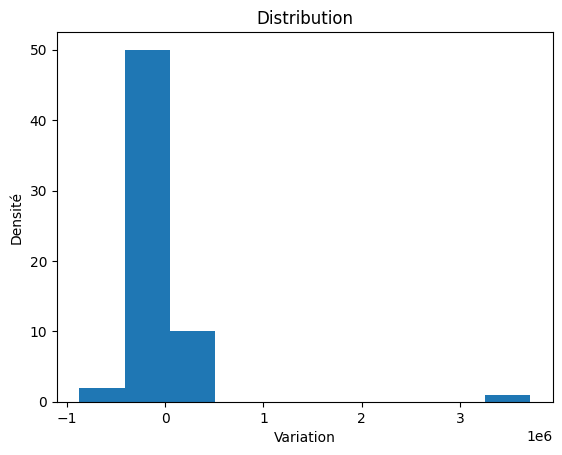

In [82]:
plt.hist(variation_df[QUANTITY_VARIATION])
plt.title("Distribution")
plt.xlabel("Variation")
plt.ylabel("Densité")
plt.show()

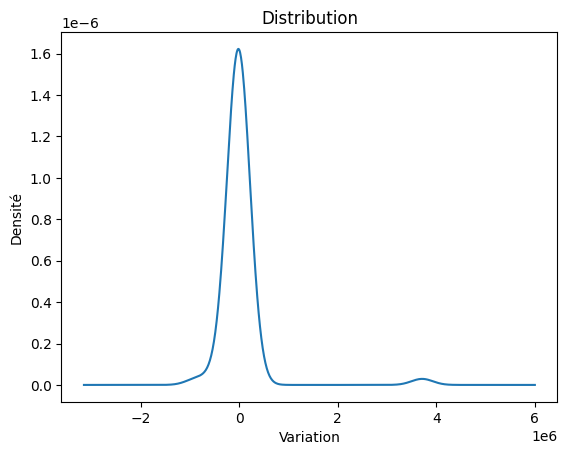

In [79]:
variation_df[QUANTITY_VARIATION].plot(kind="kde")
plt.title("Distribution")
plt.xlabel("Variation")
plt.ylabel("Densité")
plt.show()

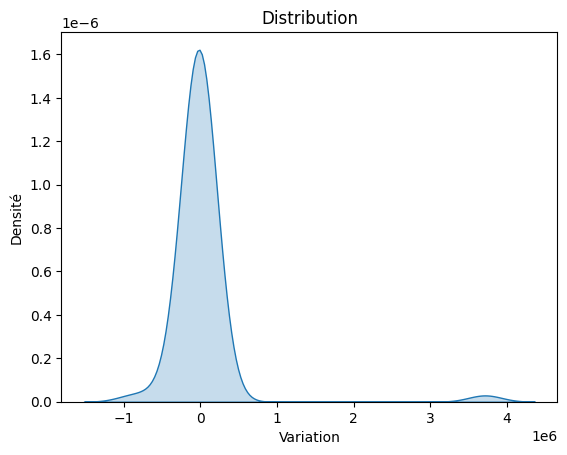

In [83]:
sns.kdeplot(variation_df[QUANTITY_VARIATION], fill=True)

plt.title("Distribution")
plt.xlabel("Variation")
plt.ylabel("Densité")
plt.show()